<a href="https://colab.research.google.com/github/perelygin/MFTI/blob/master/Neuronets_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Полезные ссылки
[Туториал по PyTorch: от установки до готовой нейронной сети](https://neurohive.io/ru/tutorial/glubokoe-obuchenie-s-pytorch/

#Лекция 1. Нейрон, нейронная сеть и полносвязные нейронные сети


##Математическая модель нейрона



![alt text](https://drive.google.com/uc?id=1TzPb_8QFUoCAjxnC5ucpKT_Tdf2v5pGW)

На вход нейрона подаются сигналы $x_i$. Каждый сигнал умножается на свой весовой коэффициент $w_i$. Тем самым мы можем регулировать влияние каждого входа на нейрон. Затем все входные сигналы суммируются,  прибавляется смещение $b$,  и все подается на вход функции активации.  Пороговая(передаточная) функция активации принимает значение 1 если на вход подано значение выше значения порога активации.  В противном случае она принимает значение 0. В общем случае эта функция может быть любой.

Сумму входных сигналов с учетом весовых коэффициентов можно представить в виде скалярного произведения вектора входов $\overline{x}$ и вектора весов $\overline{w}$.


**Разделяющая поверхность нейрона.** Это набор точек в которых пороговая функция активации менят свое значение. Разделяющая поверхность нейрона линейна,  а разделяющая поверхность нейронной сети - не линейна.

**Функции активации** 


*   Пороговая функция: 
$\begin{equation*}
f(z) = 
 \begin{cases}
   0 &\text{if $z<0$}\\
   1 &\text{if $z\geqslant 0$}
 \end{cases}
\end{equation*}$

*   Сигмоида: $\sigma(z)=\frac{1}{1+e^{-\frac{e}{T}}}$ 

При $T\rightarrow 0 \;\;\;\; \sigma(z)\rightarrow f(x)$

![alt text](https://drive.google.com/uc?id=18tjCLplqrlXtyIfx4Y03E6K7zCNcfiFb)


В нейронных сетях параметр $T$ не используется -  его можно внести в параметры $w \; и \; b$

С помощью нейронов можно реализовать различные функциии, в том числе и логические функции.

##Полносвязанные нейронные сети

**Пример задачи: восстановление зависисмости.**
![alt text](https://drive.google.com/uc?id=1H-BLMgcbeMyXtFBUw2aFl3B7FqdlU4Ub)


что нам нужно для решения этой задачи:
*  Архитектура НС - это то в каком порядке нейроны соединены между собой. А так же используемые типы функций активации.  
*   Функция потерь -  говорит нам о том, на сколько плохо  НС решает поставленную задачу. 
*   Метод оптимизации - говорит о том,  как  выполнять насторку параметров НС(Алгоритм) для уменьшения функции потерь
*   Метрики   - смотрим на то, как работает НС.  В отличие от функции потерь не применяется для настроки НС



Будем приближать наши значения с помощью суммы сигмоид.При помощи линейной
комбинации сигмоид можно с любой точностью приблизить любую ограниченную функцию с не более, чем счетным числом разрывов.
![alt text](https://drive.google.com/uc?id=12-HwIZGvFZghDXzqA1aTnvu4HTIMeR2O)
![alt text](https://drive.google.com/uc?id=1JSZjOXmcPcxfmFaeSLYu_me2zMfIrzNU)

##Градиентный спуск. 


Градиентный спуск - метод поиска локального минимума функции. 
Пусть $t$ - некоторый момент времени, а  $\alpha$ - шаг градиентного спуска.  Тогда $f(x^t)$ - значение функции в этот момент времени.  Для нахождения минимума функции,  итерационно считаем градиент,  отрицательное значение которого показывает нам направление уменьшения функции. Таким образом,  если $x^{t+1} = x^t - \alpha f'(x^t)$,   то   $f(x^{t+1}) = f(x^t - \alpha f'(x^t))$


В случае нейронных сетей ищут минимум функции потерь $L(f(x,w))$ где 
$w = \begin{bmatrix} w_0 \\ w_1\\ w_2\\ w_3\\...\\w_{P-1} \end{bmatrix}$  весовые коэффициенты сети, $x$ - входные сигналы, $f$ - выход сети. Тогда градиент 


$\nabla L = \begin{bmatrix} \frac{dL}{dw_0} \\ \frac{dL}{dw_1}\\ \frac{dL}{dw_2}\\ \frac{dL}{dw_3}\\...\\\frac{dL}{dw_{P-1}} \end{bmatrix}$. 
Исходя из этого:
*  Функция потерь должна быть дифференцируема. 
*  Производна функции потерь по выходу из нейронной сети должна быть отлична от нуля - иначе мы не поймем направление движения на очередном шаге. 


##дифференцирование сложной функции. Правило цепочки.Граф вычислений.
 Правил дифференцирования сложной функции:
$$\frac{df(g(x))}{dx} = \frac{df}{dg} \frac{dg}{dx}$$

В случае нейронных сетей

Так как $MSE = L(y_1,y_2)$,  где MSE - функция потерь,  $y_1, y_2$ - выходы из нейроной сети, $x_1$ -  вход во сеть,  то 
MSE зависит от 2х переменных. Обе переменные зависят от x1. Мы немного изменили x1 — y1, y2 изменились. 
Они изменились на $\frac{dy1}{dx1}, \frac{dy2}{dx1} $

На сколько изменилась L?
Из-за y1 она изменилась на $\frac{dL}{dy1}\frac{dy1}{dx1}$ 
И так далее для каждого y
На сколько она изменилась всего? На сумму этих значений:


$$
\frac{dMSE}{dx} = 
\begin{bmatrix} \frac{dMSE}{dx_1} \\ \frac{dMSE}{dx_2}\\ \frac{dMSE}{dx_3} \end{bmatrix} 
=
\begin{bmatrix}  \frac{dMSE}{dy_1}\cdot \frac{dy_1}{dx_1} + \frac{dMSE}{dy_2}\cdot \frac{dy_2}{dx_1}
 \\
\frac{dMSE}{dy_1}\cdot \frac{dy_1}{dx_2} + \frac{dMSE}{dy_2}\cdot \frac{dy_2}{dx_2}
 \\ 
\frac{dMSE}{dy_1}\cdot \frac{dy_1}{dx_3} + \frac{dMSE}{dy_2}\cdot \frac{dy_2}{dx_3}
  \end{bmatrix} 
$$
$$
\begin{matrix} \frac{dy_1}{dx_1} = w_{1,1} \ \frac{dy_2}{dx_1}= w_{2,1} 
 \\ \frac{dy_1}{dx_2} = w_{1,2} \ \frac{dy_2}{dx_3} = w_{2,2} 
 \\ \frac{dy_1}{dx_3} = w_{1,3} \ \frac{dy_2}{dx_3} = w_{2,3} 
\end{matrix} \Rightarrow
\frac{dMSE}{dx} =  w^T\cdot \frac{dMSE}{dy}  $$


**Обучающая выборка** для нейронных сетей делится на три части 
* Тренировочную,
* Валидационную, 
* Тестовую

# Лекция 2. 

## Граф  вычислений,  производная по графу вычислений

![alt text](https://drive.google.com/uc?id=1hR4WR0sS5MSC1Ga-aCrlnWd-ApLuJE1f)

Рассчитаем производную y по b2.

Исходная функция:
$$y = c_1 \cdot(x_1+b_1)\cdot \sigma(x_2+b_2) + \sigma(x_1+b_1) \cdot c_2 \cdot \tanh(x_2+b_2)$$
Производная по $b_2$ через промежуточные функции по правилу цепочки:
$$\frac{dy}{db_2} = \frac{dy}{dz_9}\cdot\frac{dz_9}{dz_6}\cdot\frac{dz_6}{dz_5}\cdot\frac{dz_5}{dz_2}\cdot\frac{dz_2}{db_2}+\frac{dy}{dz_8}\cdot\frac{dz_8}{dz_7}\cdot\frac{dz_7}{dz_4}\cdot\frac{dz_4}{dz_2}\cdot\frac{dz_2}{db_2}$$

$$z_2 = x_2+b_2 \Rightarrow \frac{dz_2}{db_2}=1 $$
$$z_4 = \sigma(z_2) \Rightarrow \frac{dz_4}{dz_2}=\sigma(z_2) \cdot (1-\sigma(z_2)) =\sigma(x_2+b_2) \cdot (1-\sigma(x_2+b_2))$$

$$z_5 = \tanh(z_2) \Rightarrow \frac{dz_5}{dz_2}=1-{tanh^2(z_2)} = 1-{tanh^2(x_2+b_2)}$$

$$z_6 = c_2 \cdot z_5  \Rightarrow  \frac{dz_6}{dz_5}  = c_2$$

$$z_7 = z_4 \cdot z_1 \Rightarrow \frac{dz_7}{dz_4}  = z_1 = x_1+b_1$$

$$z_8 =  z_7 \cdot c_1 \Rightarrow \frac{dz_8}{dz_7} = c_1$$

$$z_9 = z_3 \cdot z_6 \Rightarrow \frac{dz_9}{dz_6} = z_3 = \sigma(z_1) = \sigma(x_1+b_1) $$

$$y = z_8+z_9 \Rightarrow \frac{dy}{dz_8} = 1$$
$$y = z_8+z_9 \Rightarrow \frac{dy}{dz_9} = 1$$


$$\frac{dy}{db_2} = 1 \cdot \sigma(x_1+b_1)\cdot c_2 \cdot (1-tanh^2(x_2+b_2)) \cdot 1+ 1 \cdot c_1\cdot(x_1+b_1) \cdot \sigma(x_2+b_2) \cdot (1-\sigma(x_2+b_2))\cdot 1$$


$$\frac{dy}{db_2} =  \sigma(x_1+b_1)\cdot c_2 \cdot (1-tanh^2(x_2+b_2)) +  c_1\cdot(x_1+b_1) \cdot \sigma(x_2+b_2) \cdot (1-\sigma(x_2+b_2))$$

## Нейронная сеть с несколькими выходами.BackProp через полносвязный слой

Если у нас НС с одним выходом, мы можем записать 
$$y =  f(z) = f(<\overline{w},\overline{x}> + b) \: т.е. \; z=<\overline{w},\overline{x}> + b $$
то для НС с несколькими выходами запишем как:
$$\overline{z} = W\overline{x}+\overline{b} = 
 \begin{cases}
   z_1 = \overline{w_1} \cdot \overline{x}+b_1 \\
   z_2 = \overline{w_2} \cdot \overline{x}+b_2
 \end{cases}
 =
 \begin{bmatrix}
   \overline{w_1}  \\
   \overline{w_2} 
 \end{bmatrix}
 \cdot
 \overline{x}+
 \begin{bmatrix}
   b_1  \\
   b_2 
 \end{bmatrix}
$$ 



Если у нас на вход подается несколько векторов $\overline{x}$(по сути, один вектор $\overline{x}$ - это один объект обучающей выборки. Вся обучающая выборка - матрица $X$ состоящая из столбцов $\overline{x}$), то тогда можем записать $$Z = W \cdot X + \overline{b}$$
при этом функция потерь:
$$L = \sum_{i=1}^n L(\overline{z_i})$$ 
где $z_i$  - это значение выходов НС для $i-го$ объекта выборки. 

Полносвязанный слой. Он же libnear в pytorch. Что бы получить нелинейность нужно Добавить еще один слой - сигмоиду.

Перемножение матриц быстро выполняется на графических процессорах

Производная функции потерь по одному из весов:
$$\frac{dL}{dw_{1,i}} = \frac{dL}{dz_1} \cdot \frac{dz_1}{dw_{1,i}} = \frac{dL}{dz_1} \cdot x_i$$

Что такое производная функции потерь по матрице? Это матрица,  составленная из производных по каждому элементу матрицы $Z$.
$$Z = \begin{bmatrix}
   Z_{0,0} &...& Z_{0,n}\\
   ....\\
   Z_{m,0} &...& Z_{m,n}\\
 \end{bmatrix}$$

$$\frac{dL}{dZ} = \begin{bmatrix}
   \frac{dL}{dZ_{0,0}} &...& \frac{dL}{dZ_{0,n}}\\
   ....\\
   \frac{dL}{dZ_{m,0}} &...& \frac{dL}{dZ_{m,n}}\\
 \end{bmatrix}$$

$$\frac{dL}{d\overline{b}} = \frac{dL}{d\overline{z}}$$


$$\frac{dL}{d\overline{x}} = W^T \cdot \frac{dL}{d\overline{z}}$$


$$\frac{dL}{dW} = \frac{dL}{d\overline{z}} \cdot \overline{x}^T$$


## Пример обучения простой НС

In [0]:
import torch
import matplotlib.pyplot as plt

In [0]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

### Train dataset

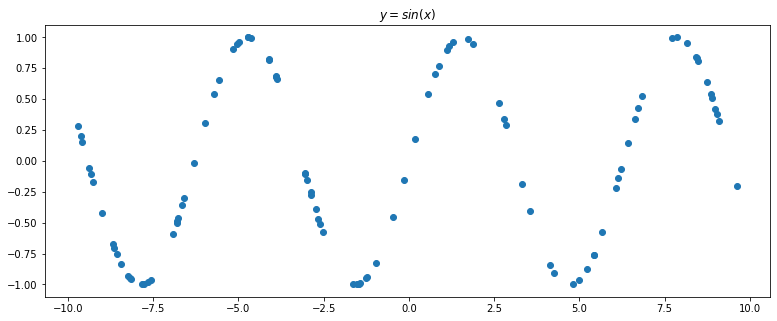

In [0]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

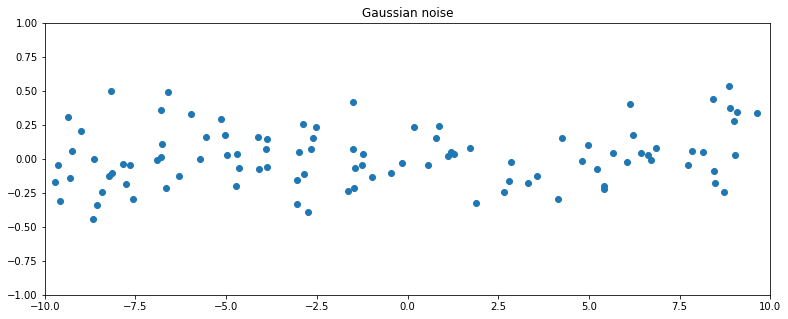

In [0]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

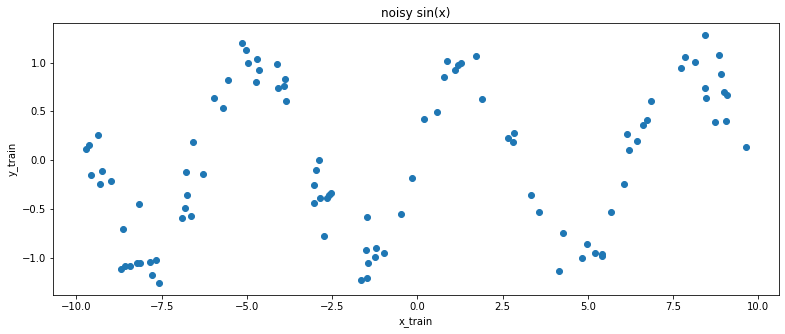

In [0]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [0]:
x_train.shape

torch.Size([100])

In [0]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [0]:
x_train.shape

torch.Size([100, 1])

In [0]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


### Validation dataset

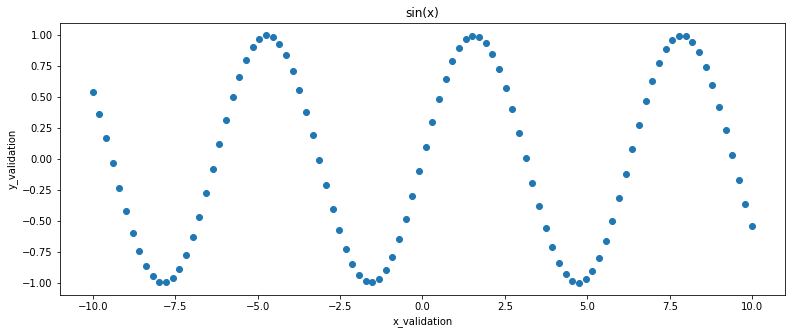

In [0]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [0]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

### Model construction

In [0]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(30)

### Prediction

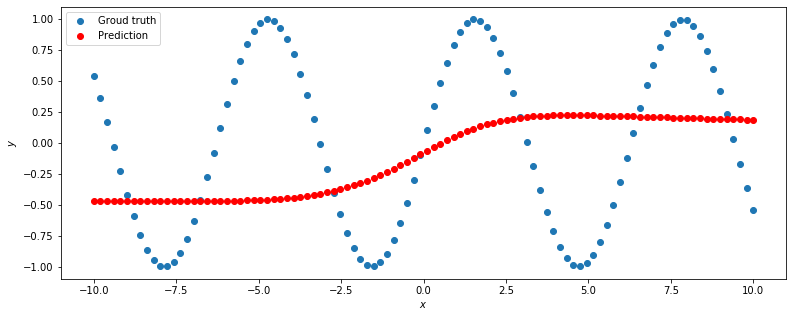

In [0]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

### Optimizer

In [0]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

### Loss function

In [0]:
#средний квадрат ошибки
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

### Training procedure

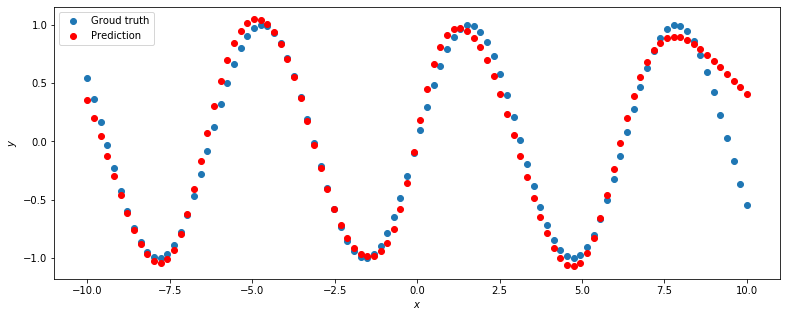

In [0]:
for epoch_index in range(2000):
    optimizer.zero_grad() #обнуляем градиенты на каждом шаге,  чтобы они непросачивались с предыдущего шага.

    y_pred = sine_net.forward(x_train) # считаем предсказание с помощью сети. Строится динамический граф вычислений. 
    loss_val = loss(y_pred, y_train)# получаем значение ошибки(функцию потерь) на предстказаных значениях

    loss_val.backward() #Делаем обратное распространение ошибки. Для всех параметров считает значение градиента. ПРибавляем градинеты к уже существующим

    optimizer.step() # Делаем шаг оптимизатора

predict(sine_net, x_validation, y_validation)

#Лекция 3. Задачи решаемые НС. Методы оптимизации

#Лекция 10. Рекурентные нейронные сети(RNN)

#Лекция 11. Затухание градиента

При классификации текста, нам нужно сначала его прочитать и потом выполнить классификацию.  В отличии от задачи генерации текста,  ошибку мы получаем только в конце. В итоге эта ошибка проходит через все итерации(перемножаем производные по всем скрытым состояниям) в обратную сторону. И если одна из производных окажется близкой к 0, то при большом числе итераций, градиент будет стремиться к 0. И это плохо.

в RNN матрица W каждый раз одна и та же. И каждый раз ее градиент будет зависеть от того кусочка контекста, который приходил на вход в этой итерации. И градиент по первой итерации будет меньше чем гралиент по последней итерации. Т.е. последняя итреациия будет оказывать больше влияние на наш контекст - происходит забывание информации.

Взрывание градиента - это когда мы делаем слишком большой градиентный шаг  и оказываемся в той области, где ошибка еще больше(когда лос-функция не гладкая или есть выбросы в данных).
Способы борьбы с этим: образека градиента(gradient clipping) -  когда мы не даем градиенту быть больше чем какое-то число. 

##RNN и CNN


биграммы - пары слов. Текст - этоодномерный сигнал, к которому можно применить свертку.
Слова в виде векторов(отображение слов в векторное пространство): 

one-hot(каждому слову - единица в совем разряде) не подходит - большая размерность и много нулевых значений. Кроме того каждое слово отнесено в отдельное измерение и слова становятся независимыми.

TF-IDF(term frequency - inverse document frequency ). В языке больше малозначимых слов(предлогов,  междометий и т.д.). Если мы решаем задачу классификации, то слова, которые есть во всех текстах не помогут нам отличить тексты друг от друга. Поэтому мы смотрим как частото встречается слов в конкретном документе и во всех текстах.  Подходит для простых задач.

Embeding- операции в пространстве смыслов. Как понять что слово что-то значит? Как понять, что слова похожи между собой или нет? Какую метрику и пространство для этого использовать?
Похожие слова- это слова, которые встречаются в одном и том же контексте. Слова определяет свой контекст и слово определяется своим контекстом.По слову предсказываем  его контекст(Игра в ассоциации).
На входе One-hot вектор(размерность словаря 100000), потом полносвязанный? слой,  потом soft-max для получения вероятности. После обучения мы получаем пространство - набор весов в скрытом слое. Используя эти веса можно очень быстро получить предсказание. потому что умножается one-hot вектор,  в котором только 1 единица.


Как сократить размер словаря:
1. Устойчивые словосочетания испольовать как отдельные токены. Например: Российская Федерация
2. **subsampling** Так как наша задача предсказать для слова его контекст, то предсказывать контекст, например по предлогам - пустая трата времени.  Поэтому мы оцениваем частоту встречаемости нашего слова во всех тех текстах с которыми мы работали, и на основании этой частоты выкидываем слово с той или иной вероятностью. Вероятность обучить на слове,  в зависимости от его частоты. Если слово встречается часто, то мы редко на нем обучаемся.  Если слово встречается редко, то мы обучаемся на нем часто. Т.е.  чем чаще встречается слово, тем чаще мы его выкидываем.
3. **Negativ sampling** тоже самое, но для случая когда у нас очень много классов(столько же сколько и слов). Умножение ошибки на ноль случайным образом. Чаще для тех слов,  которые встречаются чаще